# 1. Import dataset and split into Attributes and Target

In [19]:
#Lib
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

# Load the input dataset
df = pd.read_csv('dataset_best_2862_3000.csv')
df.head(10)

,CapacityRatio,ShareFlex,ShareStorage,ShareWind,SharePV,rNTC,Cost_[E/MWh],Congestion_[h],PeakLoad_[MW],MaxCurtailment_[MW],...,CurtailmentToRESGeneration_[%],TotalGeneration_[TWh],ShareResGeneration_[%],MaxLoadSheddingShare_[%],CF_gas,CF_nuc,CF_wat,CF_win,CF_sun,GAMS_error
0,0.753781,0.271553,0.875848,0.355617,0.160679,0.183652,95.002971,342232.0,440929.412497,0.265669,...,17.570580,2988.845784,0.000048,0.0,0.203240,0.689348,0.247897,0.177179,0.129331,1
1,0.578742,0.493152,2.755397,0.494740,0.113994,0.118749,706.110944,367563.0,440929.412497,0.389225,...,26.808339,2999.698390,0.000055,0.0,0.454996,0.825949,0.244089,0.157520,0.128098,0
2,1.267669,0.753980,2.758605,0.456891,0.281779,0.130452,90.062284,372673.0,440929.412497,0.412014,...,28.569677,3089.038330,0.000066,0.0,0.113644,0.639707,0.245816,0.145467,0.112630,1
3,1.168674,0.513135,0.672458,0.131425,0.056598,0.109961,92.624826,356327.0,440929.412497,0.054575,...,2.635613,2909.707990,0.000021,0.0,0.195025,0.840115,0.242933,0.232125,0.132789,0
4,0.780587,0.558311,2.895860,0.391405,0.183363,0.288071,95.007263,330987.0,440929.412497,0.307098,...,16.582476,3060.614655,0.000052,0.0,0.201166,0.795364,0.257988,0.181468,0.129279,1
5,0.568655,0.622806,2.208519,0.171678,0.212573,0.082090,521.839272,378544.0,440929.412497,0.161052,...,4.773577,3068.697142,0.000037,0.0,0.512149,0.953839,0.250370,0.221810,0.131097,0
6,1.098779,0.308377,1.418885,0.118913,0.256489,0.006151,88.818971,408904.0,440929.412497,0.248101,...,10.901041,3077.622804,0.000037,0.0,0.145490,0.592008,0.232589,0.213308,0.120157,0
7,1.276510,0.271858,2.517624,0.012513,0.185300,0.725843,84.149104,258290.0,440929.412497,0.010813,...,0.007914,2980.014736,0.000023,0.0,0.033354,0.886180,0.258284,0.244838,0.134437,1
8,0.740493,0.813414,1.305634,0.400257,0.244999,0.101254,97.173299,369413.0,440929.412497,0.347698,...,22.370092,3076.435974,0.000058,0.0,0.322633,0.915669,0.243088,0.160626,0.121624,0
9,1.051327,0.673208,2.430025,0.397162,0.165809,0.538571,91.493834,283032.0,440929.412497,0.276499,...,12.355590,3040.427547,0.000051,0.0,0.096260,0.841697,0.259230,0.198282,0.131534,1


In [20]:
df.columns

Index(['CapacityRatio', 'ShareFlex', 'ShareStorage', 'ShareWind', 'SharePV',
       'rNTC', 'Cost_[E/MWh]', 'Congestion_[h]', 'PeakLoad_[MW]',
       'MaxCurtailment_[MW]', 'MaxLoadShedding_[MW]', 'Demand_[TWh]',
       'NetImports_[TWh]', 'Curtailment_[TWh]', 'Shedding_[MWh]',
       'LostLoad_[TWh]', 'MaxRESGeneration_[TWh]',
       'CurtailmentToRESGeneration_[%]', 'TotalGeneration_[TWh]',
       'ShareResGeneration_[%]', 'MaxLoadSheddingShare_[%]', 'CF_gas',
       'CF_nuc', 'CF_wat', 'CF_win', 'CF_sun', 'GAMS_error'],
      dtype='object')

In [21]:
count_zero_shedding = df[df['Shedding_[MWh]'] == 0].shape[0]

print(f"Nombre de lignes avec 'Shedding_[MWh]' égal à 0 : {count_zero_shedding}")

Nombre de lignes avec 'Shedding_[MWh]' égal à 0 : 2288


In [22]:
2288/2861

0.7997203774903879

In [23]:
df.shape

(2861, 27)

In [24]:
df_filtered = df[df['GAMS_error'] != 2]
df_filtered.shape

(2655, 27)

In [25]:
# Atributes X (features); labels y (target)

Dataset = df_filtered[['CapacityRatio', 'ShareFlex', 'ShareStorage', 'ShareWind', 'SharePV','rNTC','Curtailment_[TWh]', 'Shedding_[MWh]', 'Demand_[TWh]']]
#y_curtail = Dataset['Curtailment_[TWh]']
y_shed = (100*Dataset['Shedding_[MWh]']/1e6/ Dataset['Demand_[TWh]'])
X = Dataset[['CapacityRatio', 'ShareFlex', 'ShareStorage', 'ShareWind', 'SharePV','rNTC']]
y_shed

0       0.000000
1       0.876669
2       0.000000
3       0.000000
4       0.000000
          ...   
2855    0.000000
2856    0.000000
2857    0.000000
2858    0.000000
2859    0.000000
Length: 2655, dtype: float64

In [26]:
# Check for missing data in the target

nan_values = Dataset.isnull().values.any()
if nan_values:
    print("There are NaN values in the input data.")
else:
    print("There are no NaN values in the input data.")

There are no NaN values in the input data.


In [27]:
# Correlations
correlation_matrix = Dataset.corr()
Corr_curtail = correlation_matrix['Curtailment_[TWh]']
print(Corr_curtail)

CapacityRatio       -0.088117
ShareFlex           -0.057562
ShareStorage        -0.069412
ShareWind            0.821606
SharePV              0.285197
rNTC                -0.257180
Curtailment_[TWh]    1.000000
Shedding_[MWh]       0.132845
Demand_[TWh]              NaN
Name: Curtailment_[TWh], dtype: float64


In [28]:
Corr_shed = correlation_matrix['Shedding_[MWh]']
print(Corr_shed)

CapacityRatio       -0.402016
ShareFlex           -0.017249
ShareStorage        -0.042498
ShareWind            0.140299
SharePV             -0.061406
rNTC                -0.204496
Curtailment_[TWh]    0.132845
Shedding_[MWh]       1.000000
Demand_[TWh]              NaN
Name: Shedding_[MWh], dtype: float64


# 2. SPLIT & SCALE- Target : LS

In [29]:
print(X.shape)
print(y_shed.shape)
print(type(X))
print(type(y_shed))

(2655, 6)
(2655,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [30]:
X.head(3)

,CapacityRatio,ShareFlex,ShareStorage,ShareWind,SharePV,rNTC
0,0.753781,0.271553,0.875848,0.355617,0.160679,0.183652
1,0.578742,0.493152,2.755397,0.494740,0.113994,0.118749
2,1.267669,0.753980,2.758605,0.456891,0.281779,0.130452


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_shed, test_size=0.3,random_state=42)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.28, random_state=42)

print("Taille de l'ensemble d'entraînement :", len(X_train))
#print("Taille de l'ensemble de validation   :", len(X_val))
print("Taille de l'ensemble de test         :", len(X_test))

Taille de l'ensemble d'entraînement : 1858
Taille de l'ensemble de test         : 797


In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
X_train_sc = scaler_X.fit_transform(X_train)
X_test_sc = scaler_X.transform(X_test)
#X_val_sc = scaler_X.transform(X_val)


In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler_y = MinMaxScaler()

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
#y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

In [34]:
type(y_train_scaled)
print(y_train_scaled)

[0. 0. 0. ... 0. 0. 0.]


# 3. Model Building - LS

In [35]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold, GroupKFold

num_folds = 10
error_metrics = {'neg_mean_absolute_error','neg_root_mean_squared_error'}
models = {('MLP', MLPRegressor()),('RFR', RandomForestRegressor())}
my_cv = KFold(n_splits=10, shuffle=True, random_state=42)
scoring='neg_root_mean_squared_error'

In [36]:
"""
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.utils import resample

# Séparer les données en deux ensembles : valeurs nulles et valeurs non nulles
X_train_zeros = X_train_sc[y_train_scaled == 0]
y_train_zeros = y_train_scaled[y_train_scaled == 0]
X_train_non_zeros = X_train_sc[y_train_scaled != 0]
y_train_non_zeros = y_train_scaled[y_train_scaled != 0]

# Sur-échantillonner les valeurs non nulles
X_train_non_zeros_upsampled, y_train_non_zeros_upsampled = resample(X_train_non_zeros, y_train_non_zeros, 
                                                                   replace=True, 
                                                                   n_samples=int(len(y_train_zeros)), 
                                                                   random_state=42)

# Combiner les ensembles de données
X_train_balanced = np.vstack((X_train_non_zeros_upsampled, X_train_zeros))
y_train_balanced = np.concatenate((y_train_non_zeros_upsampled, y_train_zeros))

groups = np.where(y_train_balanced == 0, 0, 1)

# MLP :
#modelo = MLPRegressor(max_iter=400, random_state=42)
modelo = MLPRegressor(random_state=42)
param_grid_mlp = {
    'hidden_layer_sizes': [(200, 100, 100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.001, 0.01, 0.0001],
    'learning_rate': ['constant', 'adaptive']
}

# Search for the best combination of hyperparameters
grid_search_mlp = GridSearchCV(estimator=modelo, param_grid=param_grid_mlp, scoring=scoring, cv=my_cv, n_jobs=-1)
grid_search_mlp.fit(X_train_balanced, y_train_balanced)

best_mlp = grid_search_mlp.best_estimator_

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (grid_search_mlp.best_score_, grid_search_mlp.best_params_))
means = grid_search_mlp.cv_results_['mean_test_score']
stds = grid_search_mlp.cv_results_['std_test_score']
params = grid_search_mlp.cv_results_['params']
"""

'\nimport numpy as np\nfrom sklearn.neural_network import MLPRegressor\nfrom sklearn.model_selection import GridSearchCV, KFold\nfrom sklearn.utils import resample\n\n# Séparer les données en deux ensembles : valeurs nulles et valeurs non nulles\nX_train_zeros = X_train_sc[y_train_scaled == 0]\ny_train_zeros = y_train_scaled[y_train_scaled == 0]\nX_train_non_zeros = X_train_sc[y_train_scaled != 0]\ny_train_non_zeros = y_train_scaled[y_train_scaled != 0]\n\n# Sur-échantillonner les valeurs non nulles\nX_train_non_zeros_upsampled, y_train_non_zeros_upsampled = resample(X_train_non_zeros, y_train_non_zeros, \n                                                                   replace=True, \n                                                                   n_samples=int(len(y_train_zeros)), \n                                                                   random_state=42)\n\n# Combiner les ensembles de données\nX_train_balanced = np.vstack((X_train_non_zeros_upsampled, X_train_zeros))\

In [37]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.utils import resample


X_train_zeros = X_train_sc[y_train_scaled == 0]
y_train_zeros = y_train_scaled[y_train_scaled == 0]
X_train_non_zeros = X_train_sc[y_train_scaled != 0]
y_train_non_zeros = y_train_scaled[y_train_scaled != 0]


X_train_non_zeros_upsampled, y_train_non_zeros_upsampled = resample(X_train_non_zeros, y_train_non_zeros, 
                                                                   replace=True, 
                                                                   n_samples=int(len(y_train_zeros)), 
                                                                   random_state=42)


X_train_balanced = np.vstack((X_train_non_zeros_upsampled, X_train_zeros))
y_train_balanced = np.concatenate((y_train_non_zeros_upsampled, y_train_zeros))

groups = np.where(y_train_balanced == 0, 0, 1)

# MLP :
modelo = MLPRegressor(random_state=42)
param_grid_mlp = {
    'hidden_layer_sizes': [(200, 100, 100, 50)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant']
}

# Search for the best combination of hyperparameters
grid_search_mlp = GridSearchCV(estimator=modelo, param_grid=param_grid_mlp, scoring=scoring, cv=my_cv, n_jobs=-1)


start_time = time.time()

grid_search_mlp.fit(X_train_balanced, y_train_balanced)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Temps d'exécution : {elapsed_time:.4f} secondes")

best_mlp = grid_search_mlp.best_estimator_

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (grid_search_mlp.best_score_, grid_search_mlp.best_params_))
means = grid_search_mlp.cv_results_['mean_test_score']
stds = grid_search_mlp.cv_results_['std_test_score']
params = grid_search_mlp.cv_results_['params']

Temps d'exécution : 14.4098 secondes
Best result: -0.011340 using the following hyperparameters {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 100, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


# 4. Results

This part contains:

- The evaluation on test fold
- Different plots
- Surface plots of the surrogate model
- Surface plots by going out of the range of definition of the regression

In [39]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

final_model_mlp = best_mlp  

start_time = time.time()

test_pred_MLP = final_model_mlp.predict(X_test_sc)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Temps d'exécution : {elapsed_time:.4f} secondes")

test_r2 = r2_score(y_test_scaled, test_pred_MLP)
test_rmse = root_mean_squared_error(y_test_scaled, test_pred_MLP)
test_mae = mean_absolute_error(y_test_scaled, test_pred_MLP)
print(f'Final model test root_mean_squared_error : {test_rmse}')
print(f'Final model test r2 score : {test_r2}')
print(f'Final model test mean_absolute_error : {test_mae}')

Temps d'exécution : 0.0220 secondes
Final model test root_mean_squared_error : 0.014358127617078555
Final model test r2 score : 0.9843823836164122
Final model test mean_absolute_error : 0.006797443746821849


<function matplotlib.pyplot.show(close=None, block=None)>

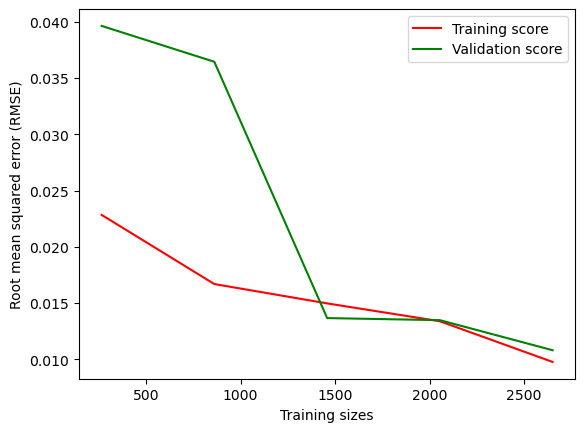

In [560]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
train_sizes, train_scores, val_scores = learning_curve(best_mlp, X_train_balanced, y_train_balanced, cv=my_cv, scoring= 'neg_root_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0,5))


train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = -np.std(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
val_scores_std = -np.std(val_scores, axis=1)

plt.figure()
plt.xlabel( 'Training sizes')
plt.ylabel( 'Root mean squared error (RMSE)' )


plt.plot(train_sizes, train_scores_mean, color="r", label="Training score")

plt.plot(train_sizes, val_scores_mean, color="g", label="Validation score")

plt.legend(loc="best")
plt.show

In [558]:
y_predict_curtail_MLP_test_rescaled = scaler_y.inverse_transform(test_pred_MLP.reshape(-1, 1)).ravel()
y_test_rescaled = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

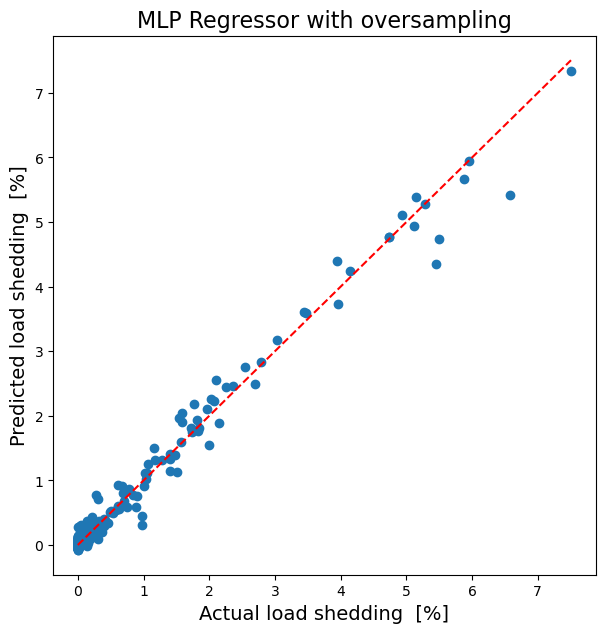

In [559]:
plt.figure(figsize=(7, 7))

plt.scatter(y_test_rescaled, y_predict_curtail_MLP_test_rescaled)
plt.plot([min(y_test_rescaled), max(y_test_rescaled)], [min(y_test_rescaled), max(y_test_rescaled)], '--r')
plt.xlabel('Actual load shedding  [%]', fontsize=14)
plt.ylabel('Predicted load shedding  [%]' , fontsize=14)
plt.title('MLP Regressor with oversampling', fontsize=16)

plt.show()

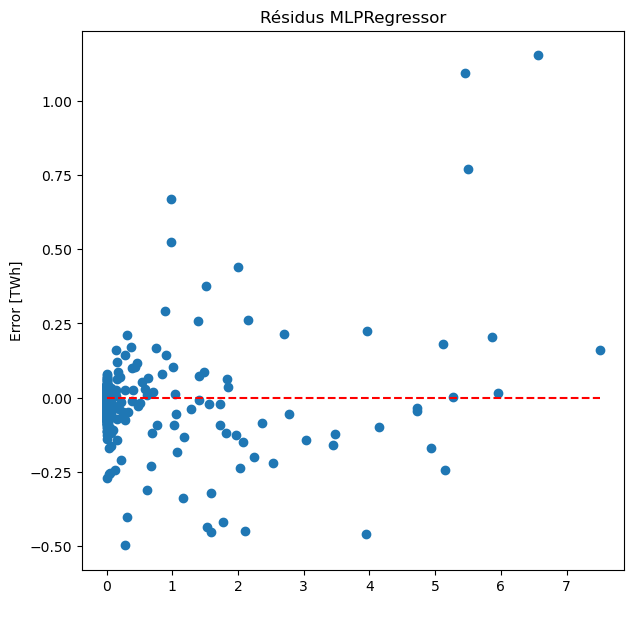

In [447]:
# Plotting the residuals
plt.figure(figsize=(7, 7))

residuals_mlp = y_test_rescaled - y_predict_curtail_MLP_test_rescaled
plt.scatter(y_test_rescaled, residuals_mlp)
plt.hlines(y=0, xmin=min(y_test_rescaled), xmax=max(y_test_rescaled), colors='r', linestyles='--')
plt.xlabel(' ')
plt.ylabel('Error [TWh]')
plt.title('Résidus MLPRegressor')

plt.show()

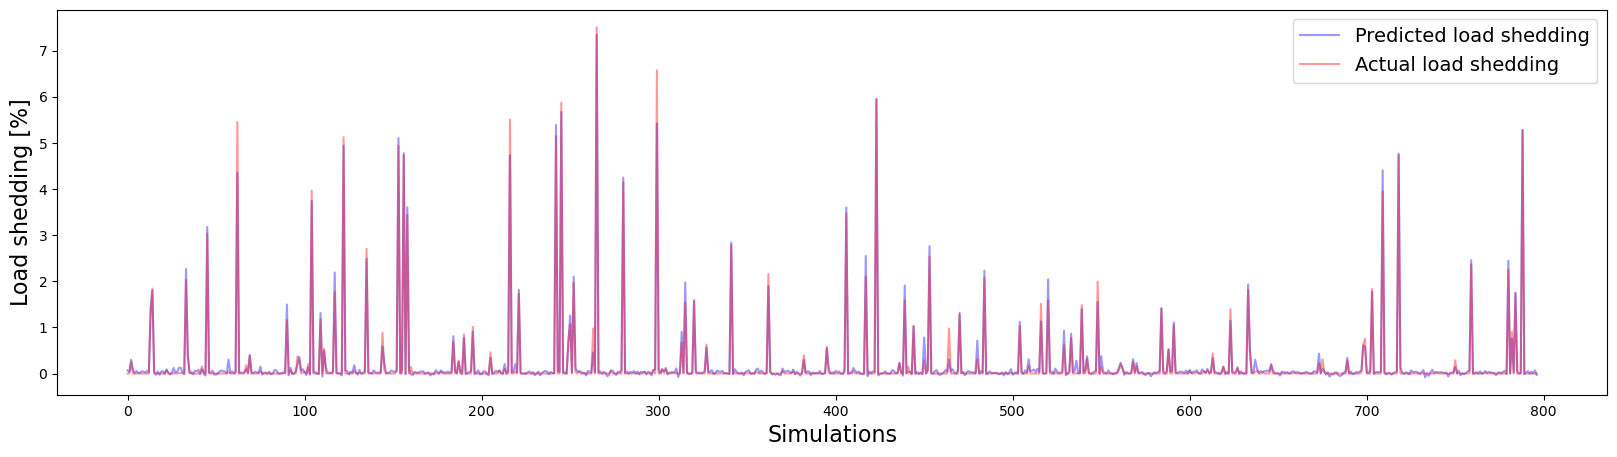

In [448]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(20, 5))
plt.xlabel('Simulations', fontsize=16)
plt.ylabel('Load shedding [%]', fontsize=16)
plt.plot(x, y_predict_curtail_MLP_test_rescaled, alpha=0.4, color='blue', label='Predicted load shedding')
plt.plot(x, y_test_rescaled, alpha=0.4, color='red', label='Actual load shedding')
plt.legend(loc='upper right', fontsize=14)
plt.show()

### TEST ZONE

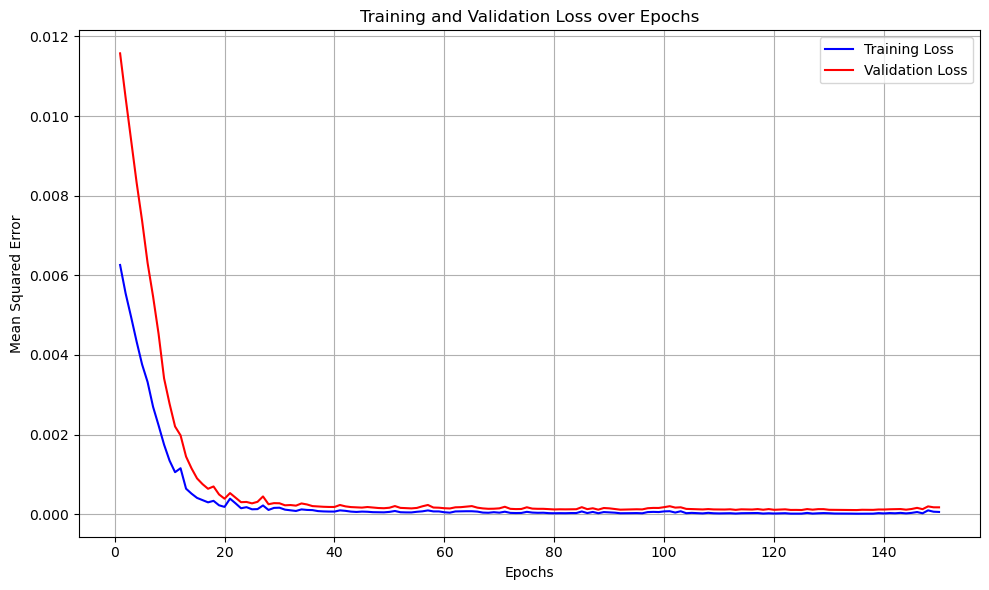

In [36]:
#TEST ZONE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mlp1 = MLPRegressor(hidden_layer_sizes=(128, 64, 32, 16), activation='relu', solver='adam', alpha=0.0001, learning_rate='constant')


num_epochs = 150


train_loss_list = []
val_loss_list = []


for epoch in range(num_epochs):
    mlp1.partial_fit(X_train_sc, y_train_scaled) 

    y_train_pred = mlp1.predict(X_train_sc)
    train_loss = mean_squared_error(y_train_scaled, y_train_pred)
    train_loss_list.append(train_loss)
    
    y_test_pred = mlp1.predict(X_test_sc)
    test_loss = mean_squared_error(y_test_scaled, y_test_pred)
    val_loss_list.append(test_loss)


plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_loss_list, linestyle='-', color='b', label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_loss_list, linestyle='-', color='r', label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [450]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

  

x1_values = np.linspace(0, 1, 15) 
x2_values = np.linspace(0, 1, 15)  
x1_mesh, x2_mesh = np.meshgrid(x1_values, x2_values)


x1 = np.linspace(0.3, 1.3, 15) 
x2 = np.linspace(0.25, 1.0, 15)  
x3 = np.linspace(0, 3.00, 15)  
x4 = np.linspace(0, 0.55, 15)  
x5 = np.linspace(0, 0.35, 15)  
x6 = np.linspace(0, 0.75, 15)  



valeurs_scaled = scaler_X.transform(np.array([1.16, 0.42, 0.001, 0.2, 0.05, 0.28]).reshape(1, -1))

static_values = np.full(225, 0.5)  
CR_static = np.full(225, valeurs_scaled[0, 0])
flex_static = np.full(225, valeurs_scaled[0, 1])
sto_static = np.full(225, valeurs_scaled[0, 2])
wind_static = np.full(225, valeurs_scaled[0, 3])
PV_static = np.full(225, valeurs_scaled[0, 4])
NTC_static = np.full(225, valeurs_scaled[0, 5])


print(valeurs_scaled)


[[ 8.44469439e-01  2.61114562e-01 -8.96200775e-05  3.63295417e-01
   1.42290882e-01  3.73147009e-01]]


C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


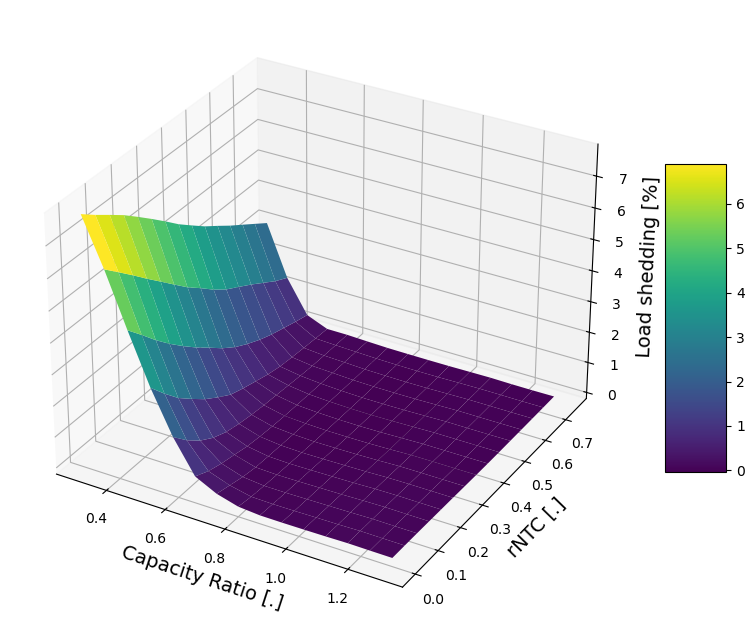

In [452]:
# CR-rNTC 
input_data = np.column_stack((x1_mesh.flatten(), flex_static, sto_static, wind_static, PV_static , x2_mesh.flatten()))

predictions = best_mlp.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)


predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)

A, B = np.meshgrid(x1, x6)

fig = plt.figure(figsize=(10, 8))


ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(A, B, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('Capacity Ratio [.]', fontsize=14)
ax1.set_ylabel('rNTC [.]',fontsize=14)
ax1.set_zlabel('Load shedding [%]',fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)


plt.show()

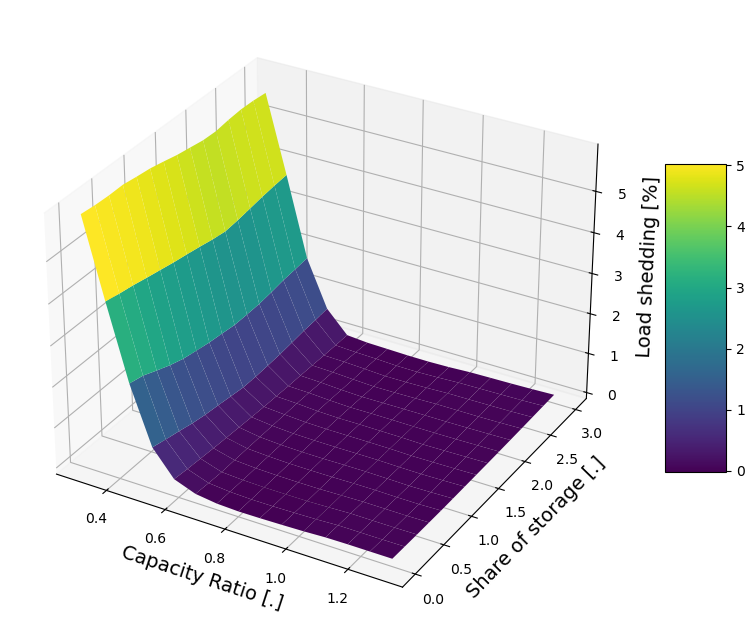

In [454]:
# CR-storage 
input_data = np.column_stack((x1_mesh.flatten(), flex_static, x2_mesh.flatten(), wind_static, PV_static , NTC_static))

predictions = best_mlp.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)


predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)

A, B = np.meshgrid(x1, x3)

fig = plt.figure(figsize=(10, 8))


ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(A, B, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('Capacity Ratio [.]', fontsize=14)
ax1.set_ylabel('Share of storage [.]',fontsize=14)
ax1.set_zlabel('Load shedding [%]',fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)


plt.show()

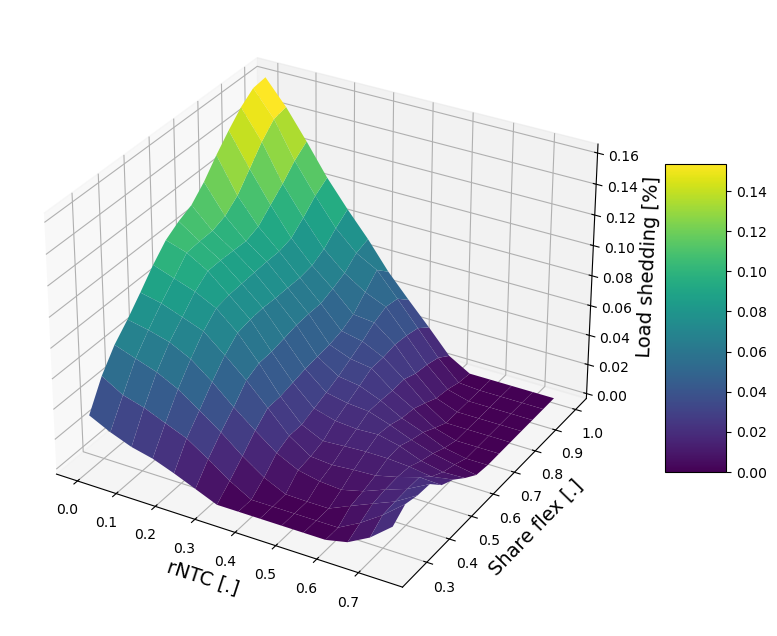

In [464]:
# rNTC-flex
input_data = np.column_stack((CR_static, x2_mesh.flatten(), sto_static, wind_static, PV_static , x1_mesh.flatten()))

predictions = best_mlp.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)


predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)
predictions_original = np.where(predictions_original < 0, 0, predictions_original)
A, B = np.meshgrid(x6, x2)

fig = plt.figure(figsize=(10, 8))


ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(A, B, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('rNTC [.]', fontsize=14)
ax1.set_ylabel('Share flex [.]',fontsize=14)
ax1.set_zlabel('Load shedding [%]',fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)


plt.show()

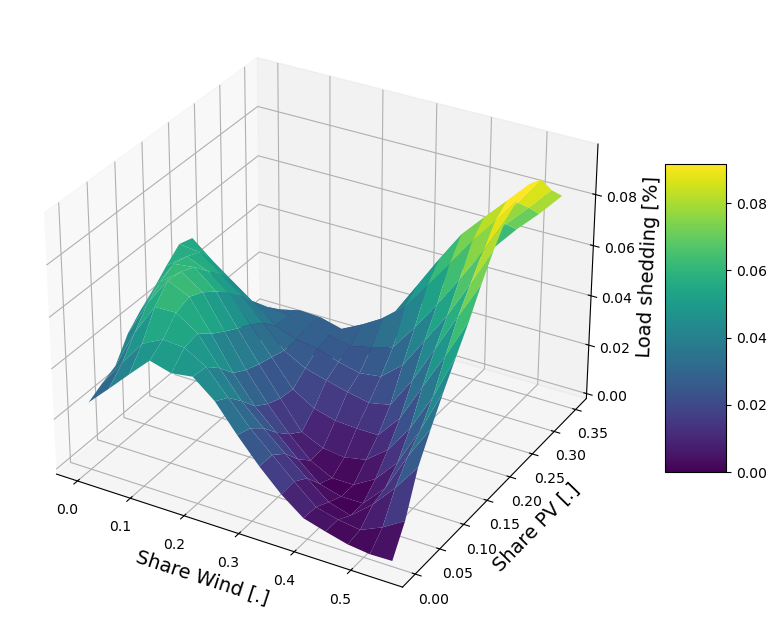

In [456]:
# Wind-PV
input_data = np.column_stack((CR_static, flex_static, sto_static, x1_mesh.flatten(), x2_mesh.flatten(), NTC_static))


predictions = best_mlp.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)


predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)
predictions_original = np.where(predictions_original < 0, 0, predictions_original)

fig = plt.figure(figsize=(10, 8))

A, B = np.meshgrid(x4, x5)

ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(A, B, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('Share Wind [.]', fontsize=14)
ax1.set_ylabel('Share PV [.]',fontsize=14)
ax1.set_zlabel('Load shedding [%]',fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)


plt.show()

In [40]:
bounds_basic = [[0.1, 0.1, 0.0, 0.0, 0.0, 0.0],[2, 0.99, 6, 1.10, 0.7, 1.5]]
Bounds_info = scaler_X.transform(bounds_basic)
np.set_printoptions(suppress=True)
print(np.round(Bounds_info, 3)) 

[[-0.334 -0.232 -0.    -0.001 -0.001 -0.   ]
 [ 1.778  1.139  2.001  2.001  2.001  2.001]]


C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [41]:
# Going out of the range 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



x1v = np.linspace(Bounds_info[0,0], Bounds_info[1,0], 15) 
x2v = np.linspace(Bounds_info[0,1], Bounds_info[1,1], 15)
x3v = np.linspace(Bounds_info[0,2], Bounds_info[1,2], 15) 
x4v = np.linspace(Bounds_info[0,3], Bounds_info[1,3], 15) 
x5v = np.linspace(Bounds_info[0,4], Bounds_info[1,4], 15) 
x6v = np.linspace(Bounds_info[0,5], Bounds_info[1,5], 15)


x1 = np.linspace(bounds_basic[0][0], bounds_basic[1][0], 15)
x2 = np.linspace(bounds_basic[0][1], bounds_basic[1][1], 15)
x3 = np.linspace(bounds_basic[0][2], bounds_basic[1][2], 15)
x4 = np.linspace(bounds_basic[0][3], bounds_basic[1][3], 15)
x5 = np.linspace(bounds_basic[0][4], bounds_basic[1][4], 15)
x6 = np.linspace(bounds_basic[0][5], bounds_basic[1][5], 15)


valeurs_scaled = scaler_X.transform(np.array([1.16, 0.42, 0.001, 0.2, 0.05, 0.28]).reshape(1, -1))

static_values = np.full(225, 0.5)  
CR_static = np.full(225, valeurs_scaled[0, 0])
flex_static = np.full(225, valeurs_scaled[0, 1])
sto_static = np.full(225, valeurs_scaled[0, 2])
wind_static = np.full(225, valeurs_scaled[0, 3])
PV_static = np.full(225, valeurs_scaled[0, 4])
NTC_static = np.full(225, valeurs_scaled[0, 5])


print(valeurs_scaled)


[[ 0.84446944  0.26111456 -0.00008962  0.36329542  0.14229088  0.37314701]]


C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


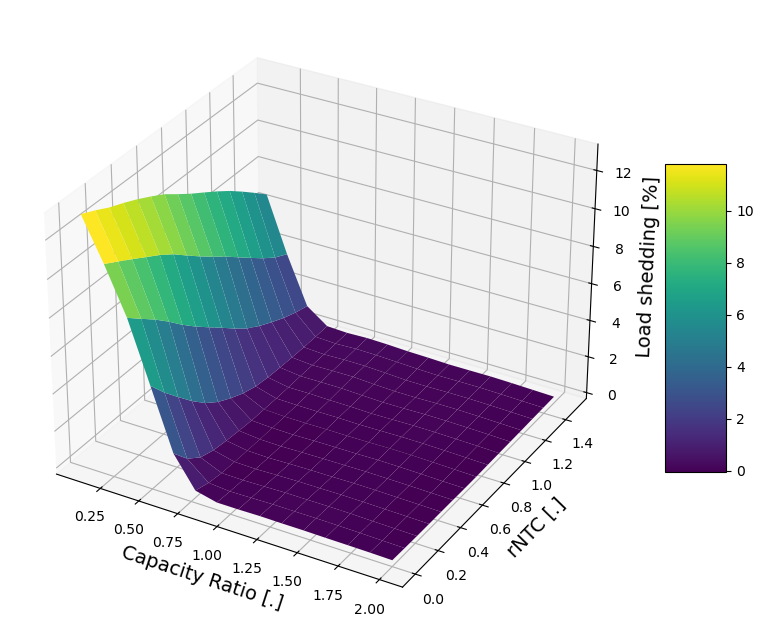

In [42]:
# CR-rNTC 
x1_mesh, x2_mesh = np.meshgrid(x1v, x6v)
input_data = np.column_stack((x1_mesh.flatten(), flex_static, sto_static, wind_static, PV_static , x2_mesh.flatten()))

predictions = best_mlp.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)


predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)

A, B = np.meshgrid(x1, x6)

fig = plt.figure(figsize=(10, 8))


ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(A, B, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('Capacity Ratio [.]', fontsize=14)
ax1.set_ylabel('rNTC [.]',fontsize=14)
ax1.set_zlabel('Load shedding [%]',fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)


plt.show()

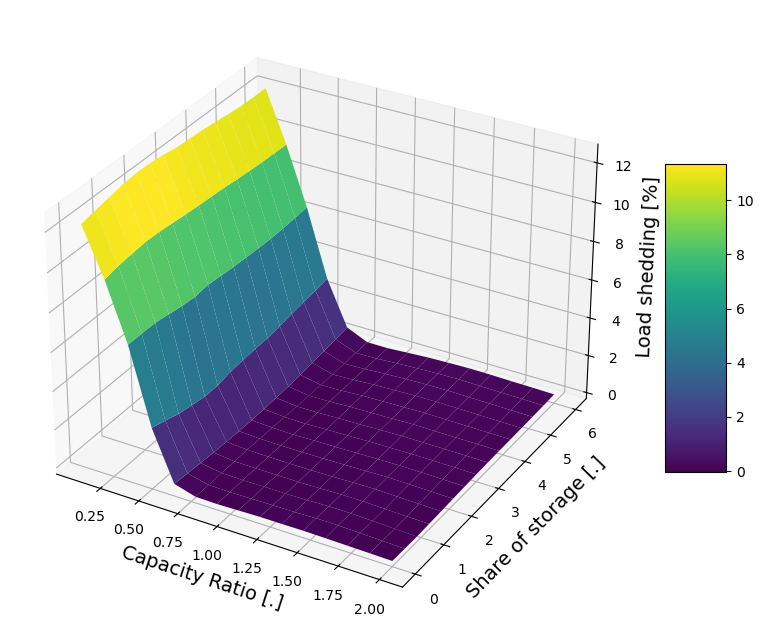

In [43]:
# CR-storage 
x1_mesh, x2_mesh = np.meshgrid(x1v, x3v)
input_data = np.column_stack((x1_mesh.flatten(), flex_static, x2_mesh.flatten(), wind_static, PV_static , NTC_static))

predictions = best_mlp.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)


predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)

A, B = np.meshgrid(x1, x3)

fig = plt.figure(figsize=(10, 8))


ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(A, B, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('Capacity Ratio [.]', fontsize=14)
ax1.set_ylabel('Share of storage [.]',fontsize=14)
ax1.set_zlabel('Load shedding [%]',fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)


plt.show()

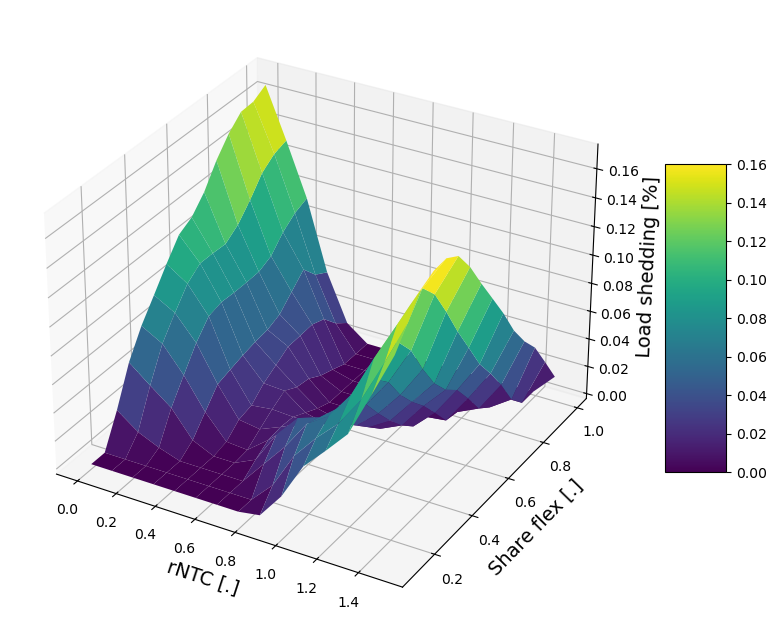

In [44]:
# rNTC-flex
x1_mesh, x2_mesh = np.meshgrid(x6v, x2v)
input_data = np.column_stack((CR_static, x2_mesh.flatten(), sto_static, wind_static, PV_static , x1_mesh.flatten()))

predictions = best_mlp.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)


predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)
predictions_original = np.where(predictions_original < 0, 0, predictions_original)
A, B = np.meshgrid(x6, x2)

fig = plt.figure(figsize=(10, 8))


ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(A, B, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('rNTC [.]', fontsize=14)
ax1.set_ylabel('Share flex [.]',fontsize=14)
ax1.set_zlabel('Load shedding [%]',fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)


plt.show()

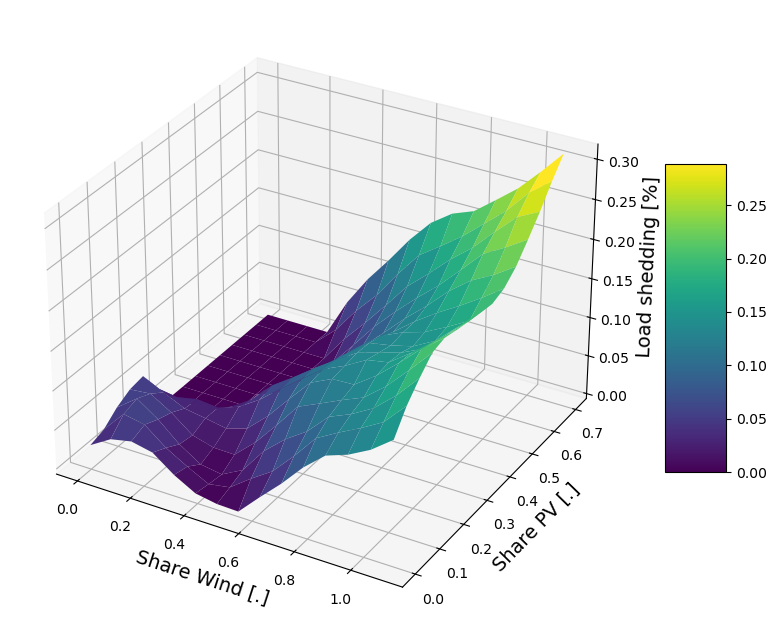

In [45]:
# Wind-PV
x1_mesh, x2_mesh = np.meshgrid(x4v, x5v)
input_data = np.column_stack((CR_static, flex_static, sto_static, x1_mesh.flatten(), x2_mesh.flatten(), NTC_static))


predictions = best_mlp.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)


predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)
predictions_original = np.where(predictions_original < 0, 0, predictions_original)

fig = plt.figure(figsize=(10, 8))

A, B = np.meshgrid(x4, x5)

ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(A, B, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('Share Wind [.]', fontsize=14)
ax1.set_ylabel('Share PV [.]',fontsize=14)
ax1.set_zlabel('Load shedding [%]',fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)


plt.show()